# 1. Import packages and load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
path = r'C:\datapot\jupyter\TEST_OM\brazilian-ecommerce'
files = [i for i in os.listdir(path) if i.endswith('.csv')]
print(files)

['olist_customers_dataset.csv', 'olist_geolocation_dataset.csv', 'olist_orders_dataset.csv', 'olist_order_items_dataset.csv', 'olist_order_payments_dataset.csv', 'olist_order_reviews_dataset.csv', 'olist_products_dataset.csv', 'olist_sellers_dataset.csv', 'product_category_name_translation.csv']


In [3]:
df_geolocation = pd.read_csv( r'C:\datapot\jupyter\TEST_OM\brazilian-ecommerce\olist_geolocation_dataset.csv')
df_products = pd.read_csv( r'C:\datapot\jupyter\TEST_OM\brazilian-ecommerce\olist_products_dataset.csv')
df_products_cat = pd.read_csv(r'C:\datapot\jupyter\TEST_OM\brazilian-ecommerce\product_category_name_translation.csv')
df_sellers = pd.read_csv( r'C:\datapot\jupyter\TEST_OM\brazilian-ecommerce\olist_sellers_dataset.csv')
df_customers = pd.read_csv(r'C:\datapot\jupyter\TEST_OM\brazilian-ecommerce\olist_customers_dataset.csv')
df_order_iteam  = pd.read_csv(r'C:\datapot\jupyter\TEST_OM\brazilian-ecommerce\olist_order_items_dataset.csv')
df_order = pd.read_csv(r'C:\datapot\jupyter\TEST_OM\brazilian-ecommerce\olist_orders_dataset.csv')
df_order_payment = pd.read_csv(r'C:\datapot\jupyter\TEST_OM\brazilian-ecommerce\olist_order_payments_dataset.csv')
df_order_review = pd.read_csv(r'C:\datapot\jupyter\TEST_OM\brazilian-ecommerce\olist_order_reviews_dataset.csv')

# 2. Data exploratory and cleaning data

Gồm một số bước cơ bản sau:
+ Khám phá bộ dữ liệu 
    + Loại bỏ duplicate
    + Thông tin về số trường, số dòng, kiểu dữ liệu, kích thước bảng dữ liệu
    + Kiểm tra số lượng null, số giá trị unique
    + Khám phá đặc trưng của bảng dữ liệu, ý nghĩa các bảng dữ liệu
+ Làm sạch dữ liệu (nếu có)
+ Tổ chức lại các bảng dữ liệu (data model)

## 2.1. Geolocation dataset
### (olist_geolocation_dataset)

Tóm tắt:
- Bảng dữ liệu về danh mục mã zip code tương ứng với các kinh độ, vĩ độ, thành phố và các vùng
- Sao paulo thuộc SP stage là thành phố có nhiều mã zipcode nhất
- Bộ dữ liệu sẽ được tách làm 2 bảng: DIM_GEOLOCATION và DIM_GEOLOCATION_LAT_LNG (xem chi tiết tại data model)

In [4]:
df_geolocation.drop_duplicates(inplace=True)
df_geolocation.info()
print('_'*70)
print(df_geolocation.shape)
print('_'*70)
print(df_geolocation.isna().sum(axis=0))
print('_'*70)
print(df_geolocation.nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB
______________________________________________________________________
(738332, 5)
______________________________________________________________________
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
______________________________________________________________________
geolocatio

In [5]:
df_geolocation['geolocation_city'].value_counts().head(10)

sao paulo         79927
rio de janeiro    35177
são paulo         19718
belo horizonte    19474
curitiba          11263
porto alegre       8702
salvador           8083
guarulhos          7411
brasilia           6919
osasco             4993
Name: geolocation_city, dtype: int64

In [6]:
df_geolocation['geolocation_city'].replace (to_replace = 'são paulo', value = 'sao paulo', inplace = True)

In [7]:
df_geolocation['geolocation_city'].value_counts().head(10)

sao paulo                99645
rio de janeiro           35177
belo horizonte           19474
curitiba                 11263
porto alegre              8702
salvador                  8083
guarulhos                 7411
brasilia                  6919
osasco                    4993
sao bernardo do campo     4732
Name: geolocation_city, dtype: int64

## 2.2. Product dataset

Tóm tắt: 
- Product_category_name_translation
    - Bảng danh mục các nhóm sản phẩm với tên tiếng anh tương ứng , gồm 71 nhóm sản phẩm khác nhau
- Olist_products_dataset
    - Bảng thông tin sản phẩm: product_id của từng sản phẩm ứng với tên nhóm sản phẩm, kích thước và các thông tin mô tả khác
    - Cân nhắc loại bỏ NaN cho các bảng danh mục product trong bước điều chỉnh data model
    - Top nhóm có nhiều sản phẩm nhất lần lượt là: bed_bath_table, sports_leisurem, furniture_deco, health_beauty, housewares
    - Bổ sung thêm tên tiếng anh pc_gamer và portable_kitchen_and_food_preparation vào bảng danh mục Product_category_name_translation 
    

### (product_category_name_translation)

In [8]:
df_products_cat.drop_duplicates(inplace=True) #remove duplicate
df_products_cat.info()
print('_'*70)
print(df_products_cat.shape)
print('_'*70)
print(df_products_cat.isna().sum(axis=0))
print('_'*70)
print(df_products_cat.nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.7+ KB
______________________________________________________________________
(71, 2)
______________________________________________________________________
product_category_name            0
product_category_name_english    0
dtype: int64
______________________________________________________________________
product_category_name            71
product_category_name_english    71
dtype: int64


### (olist_products_dataset)


In [9]:
df_products.drop_duplicates(inplace=True) #remove duplicate
df_products.info()
print('_'*70)
print(df_products.shape)
print('_'*70)
print(df_products.isna().sum(axis=0))
print('_'*70)
print(df_products.nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB
______________________________________________________________________
(32951, 9)
______________________________________________________________________
product_id                      0
product_category_name     

In [10]:
df_products[df_products['product_category_name'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [11]:
df_products[df_products['product_weight_g'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_prod_check = df_products[['product_id','product_category_name']]
df_prod_check = df_prod_check['product_category_name'].value_counts().to_frame().reset_index().rename(columns = {'index':'product_category_name','product_category_name':'product_number'})
df_prod_check['percent'] = (df_prod_check[['product_number']].astype(float)/df_products.shape[0])*100
df_prod_eng = df_prod_check.head(10)
df_prod_merg = pd.merge(df_prod_eng, df_products_cat, how='left', on=None, left_on='product_category_name', right_on='product_category_name',
left_index=False, right_index=False, sort=True)
df_prod_merg.sort_values(by=['percent'],ascending=False)

,product_category_name,product_number,percent,product_category_name_english
3,cama_mesa_banho,3029,9.192437,bed_bath_table
4,esporte_lazer,2867,8.700798,sports_leisure
6,moveis_decoracao,2657,8.063488,furniture_decor
1,beleza_saude,2444,7.417074,health_beauty
9,utilidades_domesticas,2335,7.086280,housewares
0,automotivo,1900,5.766138,auto
5,informatica_acessorios,1639,4.974052,computers_accessories
2,brinquedos,1411,4.282116,toys
7,relogios_presentes,1329,4.033262,watches_gifts
8,telefonia,1134,3.441474,telephony


In [13]:
#check category product name thiếu
df_prod_merg = pd.merge(df_prod_check, df_products_cat, how='left', on=None, left_on='product_category_name', right_on='product_category_name',
left_index=False, right_index=False, sort=True)
df_prod_merg[df_prod_merg['product_category_name_english'].isna()]

,product_category_name,product_number,percent,product_category_name_english
60,pc_gamer,3,0.009104,NaN
65,portateis_cozinha_e_preparadores_de_alimentos,10,0.030348,NaN


In [14]:
#Them du lieu vao bang Product_category_name_translation
data = [['pc_gamer', 'pc_gamer'], ['portateis_cozinha_e_preparadores_de_alimentos', 'portable_kitchen_and_food_preparation']]
ad_data = pd.DataFrame(data, columns=['product_category_name', 'product_category_name_english'])
df_products_cat = pd.concat([df_products_cat, ad_data],ignore_index=True)
df_products_cat

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
70,seguros_e_servicos,security_and_services
71,pc_gamer,pc_gamer


## 2.3. Sellers dataset
Tóm tắt:
- Bảng thông tin nhân viên bán háng: seller_id tương ứng với từng nhân viên bán hàng và thông các thông tin về địa chỉ của họ
- Các nhân viên bán hàng chủ yếu sống ở Sao Paulo và Curitiba

### (olist_sellers_dataset)

In [15]:
df_sellers.drop_duplicates(inplace=True) #remove duplicate
df_sellers.info()
print('_'*70)
print(df_sellers.shape)
print('_'*70)
print(df_sellers.isna().sum(axis=0))
print('_'*70)
print(df_sellers.nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 120.9+ KB
______________________________________________________________________
(3095, 4)
______________________________________________________________________
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64
______________________________________________________________________
seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64


In [16]:
df_sellers['seller_city'].value_counts().head(10)

sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: seller_city, dtype: int64

## 2.4. Cusomer dataset
Tóm tắt:
- Bảng thông tin khách hàng
- Khách hàng tập trung nhiều nhất ở thành phố sao paulo và rio de janeiro
- Customer_id được sinh ra ứng với mỗi order_id (đơn hàng), chỉ có 1 Customer_id duy nhất
- Customer_unique_id ứng với mỗi khách hàng, 1 customer_unique_id có thể có nhiều Customer_id

In [17]:
df_customers.drop_duplicates(inplace=True) #remove duplicate
df_customers.info()
print('_'*70)
print(df_customers.shape)
print('_'*70)
print(df_customers.isna().sum(axis=0))
print('_'*70)
print(df_customers.nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.6+ MB
______________________________________________________________________
(99441, 5)
______________________________________________________________________
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
______________________________________________________________________
customer_id                 99441
customer_unique_id          96096
customer_

In [18]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [19]:
a= df_customers[['customer_city','customer_unique_id']].drop_duplicates()
a.value_counts(['customer_city'])

customer_city 
sao paulo         14984
rio de janeiro     6620
belo horizonte     2672
brasilia           2069
curitiba           1465
                  ...  
ibertioga             1
ibiajara              1
ibiara                1
ibicuitinga           1
lagoao                1
Length: 4119, dtype: int64

## 2.5. Order dataset
Tóm tắt
- Olist_order_items_dataset: 
    - Bảng thông tin về các mặt hàng (iteam) trong mỗi order, mỗi order có thể có nhiều iteam và nhiều seller khác nhau 
    - Convert shipping_limit_date về datatime
    - Bảng dữ liệu bị trùng lặp do khi khách hàng mua từ 2 iteam cùng loại trở lên sẽ tạo ra một bản ghi mới => nhóm các bản ghi trùng lặp
    - Thêm cột revenue (doanh thu) = (price + freight_value) * number_item (số lượng)
- Olist_order_payments_dataset:
    - Bảng thông tin thanh toán: thông tin về phương thức thanh toán của mỗi order_id
    - Mỗi order sẽ có nhiều phương thức thanh toán khác nhau được ghi nhận tại trường payment_sequential
    - Có 5 loại thanh toán trong đó credit card và boleto là 2 hình thức thanh toán phổ biến nhất
    - Hình thước payment_installments lớn hơn 1 lần chỉ dành cho loại thanh toán credit card
    - Tách bộ dữ liệu thành 2 bảng tại bước điều chỉnh data model
- Olist_order_dataset:
    - Bảng thông tin đơn hàng
    - Các đơn hàng sẽ có 8 trạng thái chính
    - Cẩn chuyển kiểu dữ liệu một số trường về dạng datetime
- Olist_order_review_dataset:
    - Bảng thông tin phản hồi của khách hàng theo từng đơn hàng (order)
    - Thang điểm đánh giá từ 1 đến 5 
    - Một review_id có thể cho chiều order và một order có thể có nhiều review_id
    - Cẩn chuyển kiểu dữ liệu một số trường về dạng datetime

### (olist_order_items_dataset)

In [20]:
df_order_iteam.drop_duplicates(inplace=True) #remove duplicate
df_order_iteam.info()
print('_'*70)
print(df_order_iteam.shape)
print('_'*70)
print(df_order_iteam.isna().sum(axis=0))
print('_'*70)
print(df_order_iteam.nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.9+ MB
______________________________________________________________________
(112650, 7)
______________________________________________________________________
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
___________________________

In [21]:
df_order_iteam.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [22]:
df_order_iteam['shipping_limit_date'] = pd.to_datetime(df_order_iteam['shipping_limit_date'])
df_order_iteam['shipping_limit_date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 112650 entries, 0 to 112649
Series name: shipping_limit_date
Non-Null Count   Dtype         
--------------   -----         
112650 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.7 MB


In [23]:
print(set(df_order_iteam['order_item_id']))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21}


In [24]:
df_order_iteam.loc[df_order_iteam['order_item_id'] == 21]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
57317,8272b63d03f5f79c56e9e4120aec44ef,21,79ce45dbc2ea29b22b5a261bbb7b7ee7,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,7.8,6.57


In [25]:
df_order_iteam.loc[df_order_iteam['order_id'] == '8272b63d03f5f79c56e9e4120aec44ef']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57298,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57299,8272b63d03f5f79c56e9e4120aec44ef,3,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57301,8272b63d03f5f79c56e9e4120aec44ef,5,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57303,8272b63d03f5f79c56e9e4120aec44ef,7,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57305,8272b63d03f5f79c56e9e4120aec44ef,9,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57306,8272b63d03f5f79c56e9e4120aec44ef,10,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89


In [26]:
# Đánh thứ tự tăng dần theo order_id và product_id ứng với order_item_id tăng dần
df_order_iteam['number_item'] = df_order_iteam.groupby(['order_id','product_id'])['order_item_id'].rank(method='first')
# Lấy max của number_item theo order_id và product_id để lấy được số lượng iteam mà khách hàng mua
maxes = df_order_iteam.groupby(['order_id','product_id'])['number_item'].idxmax()
a = df_order_iteam.loc[maxes]

In [27]:
a.loc[a['order_id'] == '8272b63d03f5f79c56e9e4120aec44ef']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,number_item
57307,8272b63d03f5f79c56e9e4120aec44ef,11,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,10.0
57316,8272b63d03f5f79c56e9e4120aec44ef,20,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,10.0
57317,8272b63d03f5f79c56e9e4120aec44ef,21,79ce45dbc2ea29b22b5a261bbb7b7ee7,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,7.8,6.57,1.0


In [28]:
# double check với dữ liệu df_order_iteam
b= df_order_iteam['price'] + df_order_iteam['freight_value']
print (b.sum())


15843553.24


In [29]:
a['revenue'] = (a['price'] + a['freight_value'])  * a['number_item']
a['revenue'].sum()

15843553.24

In [30]:
#thay thế dataset cũ
df_order_iteam = a
df_order_iteam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102425 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             102425 non-null  object        
 1   order_item_id        102425 non-null  int64         
 2   product_id           102425 non-null  object        
 3   seller_id            102425 non-null  object        
 4   shipping_limit_date  102425 non-null  datetime64[ns]
 5   price                102425 non-null  float64       
 6   freight_value        102425 non-null  float64       
 7   number_item          102425 non-null  float64       
 8   revenue              102425 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 7.8+ MB


### (olist_order_payments_dataset)

In [31]:
df_order_payment.drop_duplicates(inplace=True) #remove duplicate
df_order_payment.info()
print('_'*70)
print(df_order_payment.shape)
print('_'*70)
print(df_order_payment.isna().sum(axis=0))
print('_'*70)
print(df_order_payment.nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.8+ MB
______________________________________________________________________
(103886, 5)
______________________________________________________________________
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
______________________________________________________________________
order_id                99440
payment_sequential         29
payment_type                5
paymen

In [32]:
df_order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [33]:
df_order_payment['payment_sequential'].unique()

array([ 1,  2,  4,  5,  3,  8,  6,  7, 10, 11, 17, 19, 27, 12,  9, 15, 13,
       14, 16, 25, 22, 26, 29, 28, 18, 21, 24, 23, 20], dtype=int64)

In [34]:
df_order_payment['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [35]:
df_order_payment.loc[df_order_payment['payment_sequential'] == 29 ]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
39108,fa65dad1b0e818e3ccc5cb0e39231352,29,voucher,1,19.26


In [36]:
df_order_payment.loc[df_order_payment['order_id'] == 'fa65dad1b0e818e3ccc5cb0e39231352' ]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
4885,fa65dad1b0e818e3ccc5cb0e39231352,27,voucher,1,66.02
9985,fa65dad1b0e818e3ccc5cb0e39231352,4,voucher,1,29.16
14321,fa65dad1b0e818e3ccc5cb0e39231352,1,voucher,1,3.71
17274,fa65dad1b0e818e3ccc5cb0e39231352,9,voucher,1,1.08
19565,fa65dad1b0e818e3ccc5cb0e39231352,10,voucher,1,12.86
23074,fa65dad1b0e818e3ccc5cb0e39231352,2,voucher,1,8.51
24879,fa65dad1b0e818e3ccc5cb0e39231352,25,voucher,1,3.68
28330,fa65dad1b0e818e3ccc5cb0e39231352,5,voucher,1,0.66
29648,fa65dad1b0e818e3ccc5cb0e39231352,6,voucher,1,5.02
32519,fa65dad1b0e818e3ccc5cb0e39231352,11,voucher,1,4.03


In [37]:
a = df_order_payment.loc[df_order_payment['payment_installments'] > 1 ]
print(set(a['payment_type']))

{'credit_card'}


### (olist_order)

In [38]:
df_order.drop_duplicates(inplace=True) #remove duplicate
df_order.info()
print('_'*70)
print(df_order.shape)
print('_'*70)
print(df_order.isna().sum(axis=0))
print('_'*70)
print(df_order.nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.8+ MB
______________________________________________________________________
(99441, 8)
______________________________________________________________________
order_id                            0
customer_id                         0
order_status                     

In [39]:
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [40]:
df_order['order_purchase_timestamp']= pd.to_datetime(df_order['order_purchase_timestamp'])
df_order['order_approved_at']= pd.to_datetime(df_order['order_approved_at'])
df_order['order_delivered_carrier_date']= pd.to_datetime(df_order['order_delivered_carrier_date'])
df_order['order_delivered_customer_date']= pd.to_datetime(df_order['order_delivered_customer_date'])
df_order['order_estimated_delivery_date']= pd.to_datetime(df_order['order_estimated_delivery_date'])
df_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.8+ MB


In [41]:
print(set(df_order['order_status']))

{'canceled', 'created', 'invoiced', 'delivered', 'approved', 'unavailable', 'shipped', 'processing'}


In [42]:
df_order['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [43]:
d= df_order[df_order['order_delivered_customer_date'].isna()]
print(set(d['order_status']))

{'canceled', 'created', 'invoiced', 'delivered', 'approved', 'unavailable', 'shipped', 'processing'}


In [44]:
#check số đơn cancel nhưng vẫn giao hàng
c= df_order[(df_order['order_status'] == 'canceled' ) & (df_order['order_delivered_customer_date'].notnull())]

In [45]:
c.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
2921,1950d777989f6a877539f53795b4c3c3,1bccb206de9f0f25adc6871a1bcf77b2,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09
8791,dabf2b0e35b423f94618bf965fcb7514,5cdec0bb8cbdf53ffc8fdc212cd247c6,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30
58266,770d331c84e5b214bd9dc70a10b829d0,6c57e6119369185e575b36712766b0ef,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-11 15:07:11,2016-10-14 15:07:11,2016-11-29
59332,8beb59392e21af5eb9547ae1a9938d06,bf609b5741f71697f65ce3852c5d2623,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30
92636,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25
94399,2c45c33d2f9cb8ff8b1c86cc28c11c30,de4caa97afa80c8eeac2ff4c8da5b72e,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08


In [46]:
c['order_id'].count()

6

In [47]:
c= df_order[(df_order['order_status'] == 'delivered' ) & (df_order['order_delivered_customer_date'].isna())]
c.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19


### (olist_order_reviews_dataset)

In [48]:
df_order_review.drop_duplicates(inplace=True) #remove duplicate
df_order_review.info()
print('_'*70)
print(df_order_review.shape)
print('_'*70)
print(df_order_review.isna().sum(axis=0))
print('_'*70)
print(df_order_review.nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 6.1+ MB
______________________________________________________________________
(100000, 7)
______________________________________________________________________
review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
rev

In [49]:
df_order_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [50]:
df_order_review['review_creation_date'] = pd.to_datetime(df_order_review['review_creation_date'])
df_order_review['review_answer_timestamp'] = pd.to_datetime(df_order_review['review_answer_timestamp'])
df_order_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   review_id                100000 non-null  object        
 1   order_id                 100000 non-null  object        
 2   review_score             100000 non-null  int64         
 3   review_comment_title     11715 non-null   object        
 4   review_comment_message   41753 non-null   object        
 5   review_creation_date     100000 non-null  datetime64[ns]
 6   review_answer_timestamp  100000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 6.1+ MB


In [51]:
print(set(df_order_review['review_score']))

{1, 2, 3, 4, 5}


In [52]:
df_order_review['review_score'].value_counts()

5    57420
4    19200
1    11858
3     8287
2     3235
Name: review_score, dtype: int64

In [53]:
a = df_order_review[df_order_review['review_id'].duplicated()]
a.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
3337,3242cc306a9218d0377831e175d62fbf,9c5bfba7de6a4abbb6ba0baab78d1622,5,NaN,Ótimo,2017-07-21,2017-07-22 01:06:37
5757,308316408775d1600dad81bd3184556d,3fe4dbcdb046a475dbf25463c1ca78bd,5,NaN,Ajudem a rastrear uma das 3 prateleiras que fa...,2017-09-07,2017-09-11 09:58:09
7266,8ee90ac383cf825bb7f4756130d4e74a,75d5d3d16567a27eefc5752aeb063072,5,NaN,recomendo,2017-05-30,2017-06-02 18:16:17
7859,d433c252647c51309432ca0b763f969b,191abde9c3bf77d1ce67d100d8db6d15,1,NaN,NaN,2017-09-03,2017-09-06 16:11:00
9077,03a6a25db577d0689440933055111897,3fde8b7313af6b37b84b5c7594d7add0,5,NaN,Muito Bom! Gostei Bastante! Tecido Ótimo! Aten...,2017-12-15,2017-12-16 01:32:18


In [54]:
df_order_review[df_order_review['review_id'] == '3242cc306a9218d0377831e175d62fbf']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1016,3242cc306a9218d0377831e175d62fbf,711246846695fa895c1776f0ddc30b20,5,NaN,Ótimo,2017-07-21,2017-07-22 01:06:37
3337,3242cc306a9218d0377831e175d62fbf,9c5bfba7de6a4abbb6ba0baab78d1622,5,NaN,Ótimo,2017-07-21,2017-07-22 01:06:37


In [55]:
a = df_order_review[df_order_review['order_id'].duplicated()]
a.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1128,46abf3ea0b2710ad41390fdb79c32d84,5040757d4e06a4be96d3827b860b4e7c,5,NaN,NaN,2017-11-07,2017-11-10 20:07:48
3127,aa193e76d35950c4ae988237bb36ed2b,cf73e2cb1f4a9480ed70c154da3d954a,5,NaN,NaN,2018-01-18,2018-01-18 17:36:45
8164,40294ea5a778dc62080d6b3f55d361ce,e1bc1083cd7acd30d0576335373b907d,5,NaN,NaN,2018-03-23,2018-03-24 00:23:06
9128,32e2c7e889f7a185d462265398ee3631,c7cfea0c153e6382e32e84c2a9dd7d2e,5,NaN,NaN,2017-10-21,2017-10-22 00:47:25
9868,95a3135743556b117d888cc8c6e12e11,f9c78e6e58306dc81efbbada1ac11f24,3,NaN,O produto chegou antes do prazo mas recebi um ...,2017-09-14,2017-09-17 11:14:08


In [56]:
df_order_review[df_order_review['order_id'] == '5040757d4e06a4be96d3827b860b4e7c']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1035,afd9b3d196f0acd81d79d8ccd79c2430,5040757d4e06a4be96d3827b860b4e7c,5,NaN,NaN,2017-10-31,2017-11-04 21:12:29
1128,46abf3ea0b2710ad41390fdb79c32d84,5040757d4e06a4be96d3827b860b4e7c,5,NaN,NaN,2017-11-07,2017-11-10 20:07:48


In [57]:
df_order_review.describe()

,review_score
count,100000.000000
mean,4.070890
std,1.359663
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [58]:
df_order_iteam.describe()

,order_item_id,price,freight_value,number_item,revenue
count,102425.000000,102425.000000,102425.000000,102425.000000,102425.000000
mean,1.150539,124.422006,20.111152,1.099829,154.684435
std,0.563005,188.926084,15.884700,0.456926,214.501057
min,1.000000,0.850000,0.000000,1.000000,7.280000
25%,1.000000,40.000000,13.140000,1.000000,60.000000
50%,1.000000,78.800000,16.320000,1.000000,101.600000
75%,1.000000,139.000000,21.220000,1.000000,170.190000
max,21.000000,6735.000000,409.680000,20.000000,13664.080000


# Analysis

In [59]:
df_order_iteam_1 = df_order_iteam[['order_id','revenue','number_item','freight_value','price']]
df_order_iteam_1 = df_order_iteam_1.groupby(['order_id'],as_index=False).sum()
df_order1 = df_order[['order_id','order_purchase_timestamp']]
df_report1 = pd.merge(df_order1, df_order_iteam_1, how='left', on=None, left_on='order_id', right_on='order_id',
left_index=False, right_index=False, sort=True)
df_report1.dropna()

,order_id,order_purchase_timestamp,revenue,number_item,freight_value,price
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,72.19,1.0,13.29,58.90
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06,259.83,1.0,19.93,239.90
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:33:31,216.87,1.0,17.87,199.00
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:00:35,25.78,1.0,12.79,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 13:57:51,218.04,1.0,18.14,199.90
...,...,...,...,...,...,...
99436,fffc94f6ce00a00581880bf54a75a037,2018-04-23 13:57:06,343.40,1.0,43.41,299.99
99437,fffcd46ef2263f404302a634eb57f7eb,2018-07-14 10:26:46,386.53,1.0,36.53,350.00
99438,fffce4705a9662cd70adb13d4a31832d,2017-10-23 17:07:56,116.85,1.0,16.95,99.90
99439,fffe18544ffabc95dfada21779c9644f,2017-08-14 23:02:59,64.71,1.0,8.72,55.99


In [60]:
df_report_timestamp = df_report1[['order_purchase_timestamp','revenue','number_item','freight_value','price' ]]
df_report_time_plot = df_report_timestamp.groupby(['order_purchase_timestamp'],as_index=False).sum()
a=  df_report_time_plot.describe()

In [61]:
a = (20.833222/160.238212)*100
b = (20.833222/128.889244)*100
print(a)
print (b)

13.001406930326956
16.163662190461757


In [62]:
df_report_time_plot['year'] = pd.DatetimeIndex(df_report_time_plot['order_purchase_timestamp']).year
df_report_time_plot_y = df_report_time_plot[['year', 'revenue']]
df_revenue_y = df_report_time_plot_y.groupby(['year'],as_index=False).sum()
df_revenue_y

,year,revenue
0,2016,57183.21
1,2017,7142672.43
2,2018,8643697.60


- Doanh thu trung bình 1 ngày của Olist là 160.238212, olist bán được trung bình hơn 1 mặt hàng 1 ngày 
- Phí ship trung bình là 20.833222 chiếm khoảng 16% giá trị đơn hàng và 13% tổng doanh thu trung bình
- 75% Olist sẽ có doanh thu 1 ngày nhỏ hơn hoặc bằng 177.135000
- 2018 là năm có doanh thu cao nhất 8643697.60

In [63]:
order_time= df_order[['order_id','order_purchase_timestamp']]
order_time['order_purchase_timestamp']= pd.to_datetime(order_time['order_purchase_timestamp']).dt.date
order_time.sort_values('order_purchase_timestamp', inplace=True)
order_time.head(3)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2176\2197284102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_time['order_purchase_timestamp']= pd.to_datetime(order_time['order_purchase_timestamp']).dt.date
C:\Users\Admin\AppData\Local\Temp\ipykernel_2176\2197284102.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_time.sort_values('order_purchase_timestamp', inplace=True)


,order_id,order_purchase_timestamp
4541,2e7a8482f6fb09756ca50c10d7bfc047,2016-09-04
4396,e5fa5a7210941f7d56d0208e4e071d35,2016-09-05
10071,809a282bbd5dbcabb6f2f724fca862ec,2016-09-13


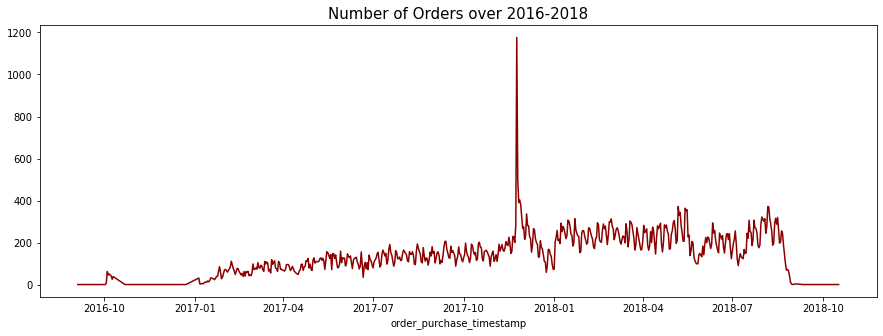

In [64]:
fig, ax= plt.subplots()
ax=order_time.groupby('order_purchase_timestamp')['order_id'].count().plot(figsize=(15,5), color='darkred')
ax.set_title('Number of Orders over 2016-2018', fontsize=15);

In [67]:
order_time['order_purchase_timestamp'].value_counts().head(5)

2017-11-24    1176
2017-11-25     499
2017-11-27     403
2017-11-26     391
2017-11-28     380
Name: order_purchase_timestamp, dtype: int64

- Qua đồ thị trên ta thấy số lượng order biến thiên khá đều , ngoại trừ thời điển gần cuối năm 2017, cần xem xét lại dữ liệu tại thời điểm trên. Đây là thời điểm cuối năm, có thể nhu cầu mua sắm tăng cao, làm xuất hiện sự biến thiên trên
    => Có thể nghiên cứu đẩy mạnh các chiến dịch marketing vào dịp này
- Ngoài ra khi xây dựng mô hình cần chú ý đến trường hợp outliner trên để tránh làm sai lệnh trong quá trình xây dựng mô hình.

In [80]:
# Thành phố nào có lượng order nhiều nhất?
df_order_city = df_order[['order_id', 'customer_id']]
df_cus_city = df_customers[['customer_id', 'customer_city']]
df_report_city = pd.merge(df_order_city, df_cus_city, how='left', on=None, left_on='customer_id', right_on='customer_id',
left_index=False, right_index=False, sort=True)
df_report_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       99441 non-null  object
 1   customer_id    99441 non-null  object
 2   customer_city  99441 non-null  object
dtypes: object(3)
memory usage: 3.0+ MB


In [83]:
df_report_city['customer_city'].value_counts()

sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
boa vista do sul         1
princesa isabel          1
santa fe de minas        1
frei rogerio             1
anhandui                 1
Name: customer_city, Length: 4119, dtype: int64

- Sao Paulo là thành phố có nhiều lượt order nhất => Tập trung đẩy mạnh bán hàng ở khu vực này. 
- Ngoài ra khu vực trên cũng nơi nhiều seller sinh sống nhất => Lợi thế khi, giảm chi chí khi đẩy mạnh bán hàng ở khu vực trên

In [86]:
# Nên đẩy mạnh bán sản phẩm trong thời gian nào?
df_order['Hours'] = df_order['order_purchase_timestamp'].dt.hour
df_hours_sales = df_order[['Hours', 'order_id']]

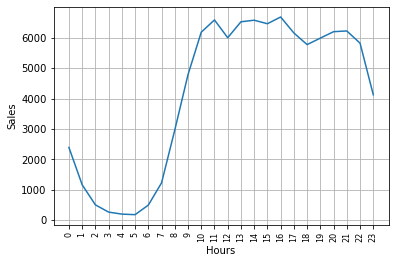

In [91]:
sales_value_hours = df_order.groupby('Hours').count()['order_id']
hours = [hour for hour, order_id in sales_value_hours.items()]
plt.plot(hours, sales_value_hours)
plt.grid()
plt.xticks(hours, rotation=90, size=8)
plt.xlabel('Hours')
plt.ylabel('Sales')
plt.show()

- Quan đồ thị ta thấy khung giờ mà khách hàng thời đặt hàng là từ 9h-11h sáng, 16h chiều và 20-21h tối => Tung các voucher khuyến mãi, hoặc đẩy mạnh quảng cáo vào những khung giờ trên